# Fitting

In [1]:
using LsqFit

In [2]:
using OrdinaryDiffEq, DiffEqParamEstim, JuMP, NLopt, Plots

In [21]:
function g(du,u,p,t)
  σ,ρ,β = p
  x,y,z = u
  du[1] = dx = σ*(y-x)
  du[2] = dy = x*(ρ-z) - y
  du[3] = dz = x*y - β*z
end

g! (generic function with 1 method)

In [22]:
u0 = [1.0;0.0;0.0]
tspan = (0.0,1.0)
model_ode(p_) = ODEProblem(g, u0, tspan,p_)
solve_model(t_, mp_) = OrdinaryDiffEq.solve(model_ode(mp_), Tsit5(), saveat=0.01)(t_)[end, :]
tdata = 0.0:0.05:1.0
udata = solve_model(tdata, [10.0, 28.0, 8/3]) + 0.001*randn(length(tdata))

21-element Array{Float64,1}:
 -0.0013756432597713446
  0.02681975278463344
  0.11196928125065303
  0.38956980122861434
  1.2681899789915134
  4.008468546850507
 11.769275620203448
 28.399284394318503
 45.82599306567478
 46.456774234842264
 38.09293384523243
 32.017024564032475
 28.734867932246374
 26.91894002883675
 25.908074747419484
 25.48189618293115
 25.579844977633652
 26.1277669228136
 26.979679410452913
 27.885716196016713
 28.5530165664791

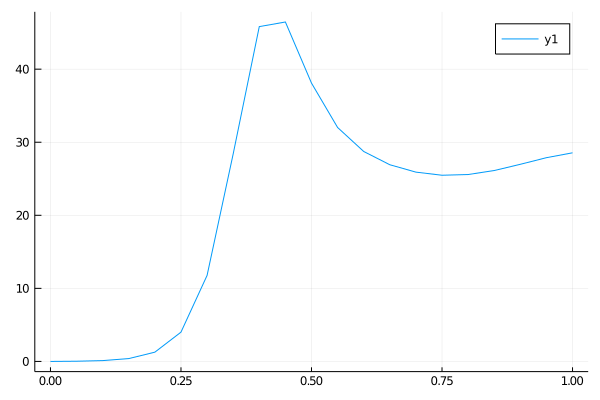

In [23]:
plot(tdata, udata)

In [24]:
p0 = [11.0, 27.0, 2.5]
fit = curve_fit(solve_model, tdata, udata, p0)

LsqFit.LsqFitResult{Array{Float64,1},Array{Float64,1},Array{Float64,2},Array{Float64,1}}([9.999875916325463, 28.000185726550704, 2.666555514885926], [0.0013756432597713446, -0.0013331780986329464, 0.0021710098258995447, 0.00018116217486768837, 0.00021282762566610103, -0.002025662814362228, 0.0007060545828014853, -0.0008794279343007361, 0.00041721431824726096, -0.0012450244918653652  …  -0.000271431010169465, 0.0008182230186157824, -0.00012590484677232894, -0.0011367012786855923, 0.0012914418845504372, 0.0001998056157859196, 0.0004544146637606161, 0.00044334060341810755, -0.0003045276850137668, -4.2711747749279994e-5], [0.0 0.0 0.0; -0.0006169662689804495 0.0011135476761086449 -0.00042923032723087375; … ; -0.8914302944741228 1.1440436502950961 7.466209384386492; -0.6229987595751906 0.7286260318801898 8.013252763511161], true, Float64[])

In [25]:
fit.param

3-element Array{Float64,1}:
  9.999875916325463
 28.000185726550704
  2.666555514885926

In [12]:
model(t, p) = p[1] * exp.(-p[2] * t)

model (generic function with 1 method)

In [15]:
tdata = range(0, 10, length=20)
ydata = model(tdata, [1.0 2.0]) + 0.01*randn(length(tdata))

20-element Array{Float64,1}:
  0.998024627463751
  0.33789619973990875
  0.10583460451273344
  0.04907213327679052
  0.007839930435085967
  0.0004912314244339307
 -0.014437470899343975
 -0.0055604887709054945
  0.012062585214190387
 -0.008919462080556793
  0.017982833274317062
  0.007173331704632155
 -0.008375619262674066
  0.004296631117240504
  0.0006474229833555366
  0.019231758650195684
 -0.012685819395611798
  0.001797886064840322
 -0.014461535616646615
 -0.0013781558683956968

In [16]:
p0 = [0.5, 0.5]

2-element Array{Float64,1}:
 0.5
 0.5

In [17]:
fit = curve_fit(model, tdata, ydata, p0)
param = fit.param

2-element Array{Float64,1}:
 0.9983366588634615
 2.0714361860561423

In [18]:
cov = estimate_covar(fit)

2×2 Array{Float64,2}:
 0.000106175  0.000161041
 0.000161041  0.00240605

In [21]:
se = stderror(fit)

2-element Array{Float64,1}:
 0.010304137262312343
 0.049051470976303906

In [26]:
confidence_interval = confidence_interval(fit, 0.1)

ErrorException: cannot assign a value to variable LsqFit.confidence_interval from module Main